In [292]:
import numpy as np 
import matplotlib.pyplot as plt

In [293]:
# generaing the datatset
data_count = 500
test_percent = 0.3
train_count = round(data_count * (1 - test_percent))
test_count = round(data_count * test_percent)
# random data from 1000 to 3000 (the area of the house in feet^2)
area = np.random.rand(data_count) * 2000 + 1000   
# random data from 1 to 10 (the number of rooms in the house)
rooms = np.random.rand(data_count) * 9 + 1
# random data from 1 to 5 (the number of bathrooms in the house)
bathrooms = np.random.rand(data_count) * 4 + 1
# random data from 1 to 3 (the number of floors in the house)
floors = np.random.rand(data_count) * 2 + 1
# random data from 1 to 20 (the number of years since the house was built)
age = np.random.rand(data_count) * 19 + 1

# generate x_train (the features of the house)
x_train = np.array([area, rooms, bathrooms, floors, age]).T
x_test = x_train[train_count:]
x_train = x_train[:train_count]

# generate y_train (the price of the house)
y_train = x_train.dot(np.array([50, 5000, 8000, 10000, -500])) + 10000
y_test = x_test.dot(np.array([50, 5000, 8000, 10000, -500])) + 10000

feature_count = x_train.shape[1]
print(y_train[0:10])      
print(x_train[0:3])
print(x_test[0:3])

[201604.08176707 204649.6999553  140099.29683962 199690.33097479
 132124.26704833 189095.39692125 217593.7170417  244619.44686284
 166043.35165012 159709.09100584]
[[2.47319038e+03 7.06011864e+00 1.58947626e+00 2.26638004e+00
  5.47128137e+00]
 [2.93305244e+03 1.58106786e+00 2.96407042e+00 2.41059971e+00
  1.54536432e+01]
 [1.38473158e+03 4.62318090e+00 2.88671555e+00 2.40947432e+00
  1.88833090e+01]]
[[1.17358233e+03 7.54422274e+00 1.19217360e+00 1.88116298e+00
  1.99131718e+00]
 [1.86803175e+03 7.93272791e+00 1.96829342e+00 2.98892627e+00
  6.71540106e+00]
 [1.79109253e+03 8.14025736e+00 4.17582202e+00 1.50510960e+00
  1.63459610e+01]]


In [294]:
# normalize data
# subtract the mean and divide by the standard deviation
original_x = x_train
original_y = y_train
def normalize(x,y=None):
    x = np.copy(x)
    for i in range(x.shape[1]):
        x[:, i] = (x[:, i] - np.mean(x[:, i])) / np.std(x[:, i])
    if y is not None:
        y = (y - np.mean(y)) / np.std(y)
    return x, y
# normalize y_train
x_train, y_train = normalize(x_train, y_train)
print(y_train[0:10])
print(x_train[0:3])

[ 0.70888695  0.80125752 -1.15649193  0.65084479 -1.39836664  0.329511
  1.19383667  2.01350014 -0.36963458 -0.5617464 ]
[[ 0.71814677  0.59440059 -1.29099262  0.51276589 -0.97247188]
 [ 1.48937978 -1.52619346 -0.03233591  0.76467769  0.8747372 ]
 [-1.10730355 -0.34878389 -0.10316643  0.76271194  1.50938757]]


<Figure size 1000x1000 with 0 Axes>

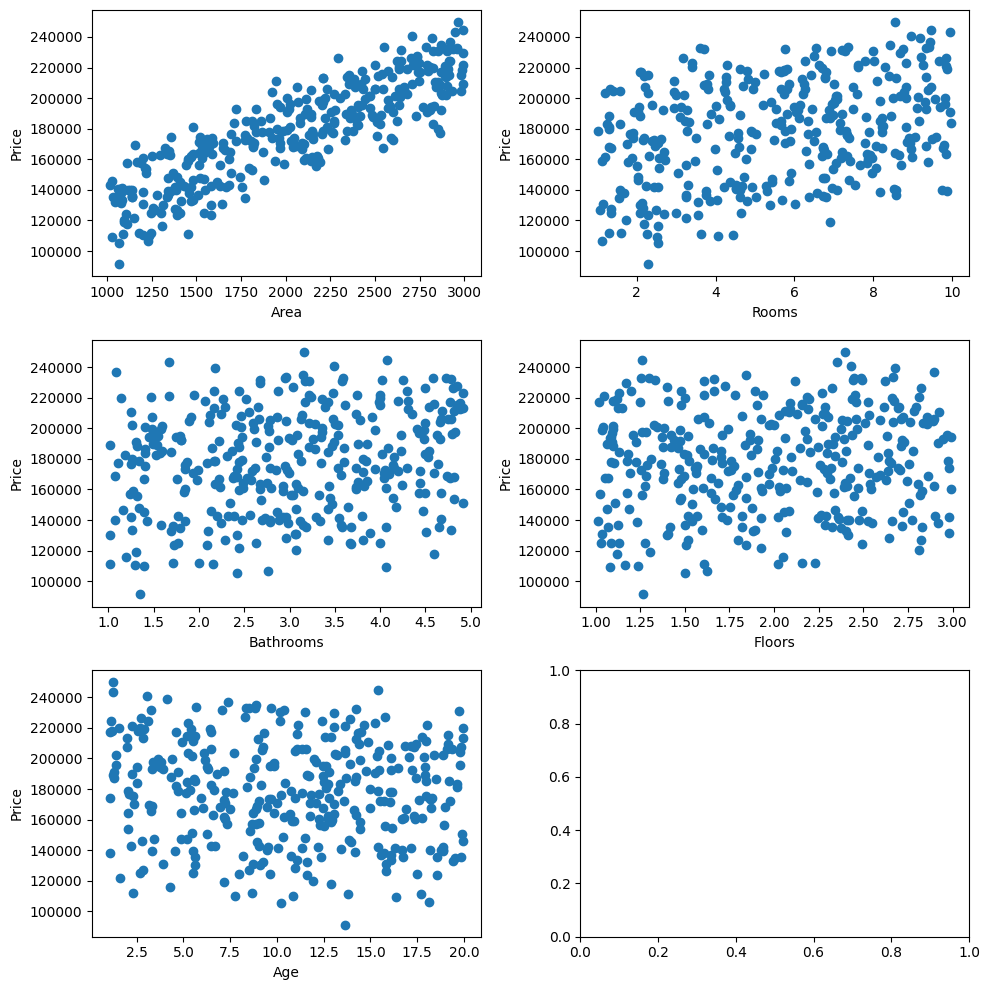

In [295]:
# plot the data
plt.figure(figsize=(10, 10))
# create a function to plot the data (works for any number of features)
def plot_features(x_train, y_train):
    features = ['Area', 'Rooms', 'Bathrooms', 'Floors', 'Age']
    fig, axs = plt.subplots(3, 2, figsize=(10,10))
    axs = axs.ravel()
    for i in range(x_train.shape[1]):
        axs[i].scatter(x_train[:, i], y_train)
        axs[i].set_xlabel(features[i])
        axs[i].set_ylabel('Price')
    plt.tight_layout()
    plt.show()
    
plot_features(original_x, original_y)



In [296]:
def compute_cost(x,y,thetas):
    return np.sum((x.dot(thetas) - y)**2) / (2*len(x))

In [297]:
# give initial values for theta
thetas = np.random.rand(feature_count + 1)
# add column of ones to x_train
x_train = np.insert(x_train, 0, 1, axis=1)
thetas

array([0.38305167, 0.13444623, 0.03598039, 0.28640499, 0.61744199,
       0.14664303])

In [298]:
def gradient(thetas, x, y, alpha=0.25, iterations=1000, plot=False):
    costs = []
    while (compute_cost(x,y,thetas) > 0.01 and iterations > 0):
        thetas = thetas - alpha * np.sum((x.dot(thetas) - y)*x.T, axis=1) / len(x)
        costs.append(compute_cost(x,y,thetas))
        iterations -= 1

    if plot:
        iters = np.arange(0, len(costs))
        plt.plot(iters, costs)
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.show()           


    return thetas

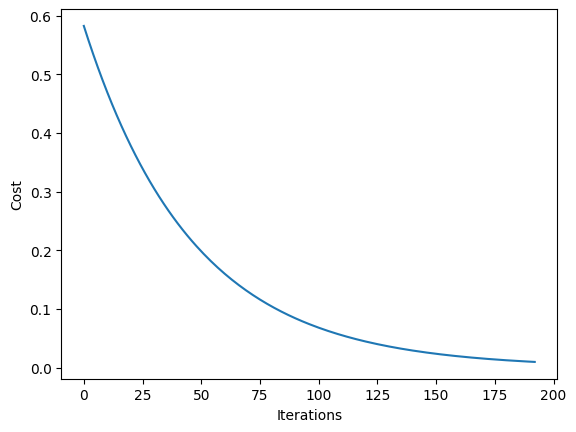

[ 0.05506174  0.79465368  0.35346555  0.25127386  0.21725305 -0.05994864]


In [299]:
thetas = gradient(thetas, x_train, y_train, 0.01, 1250, True)
print(thetas)

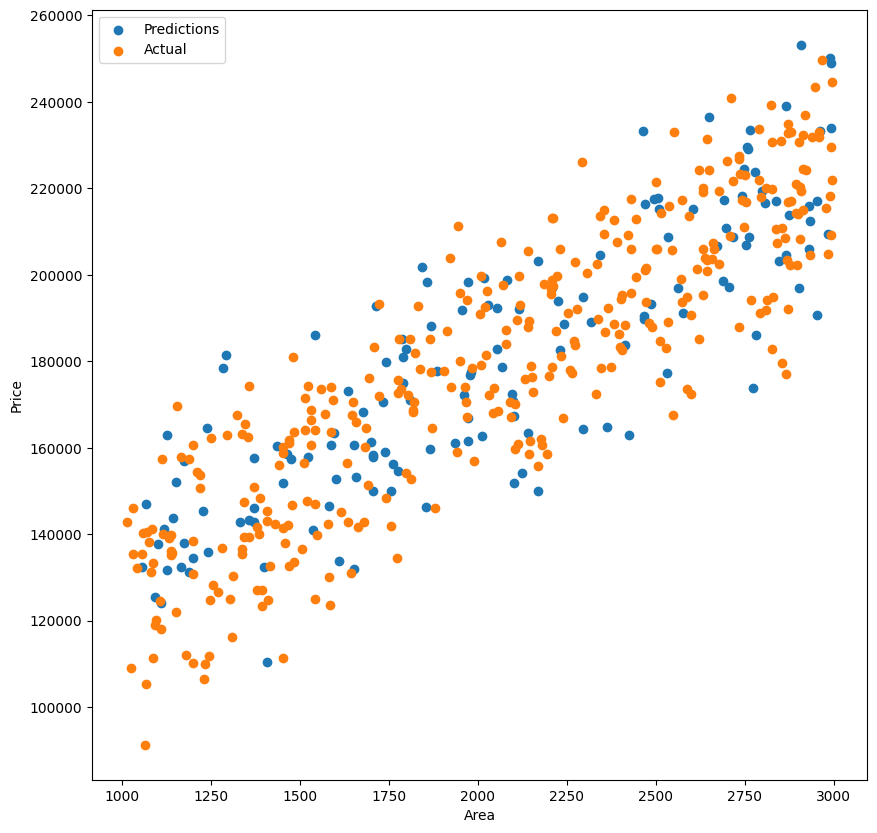

In [300]:

# make predictions
x_test_normalized = normalize(x_test)[0]
x_test_normalized = np.insert(x_test_normalized, 0, 1, axis=1)
y_test_pred = x_test_normalized.dot(thetas)
y_test_pred = y_test_pred * np.std(original_y) + np.mean(original_y)

# plot the data 
plt.figure(figsize=(10, 10))
plt.scatter(x_test[:, 0], y_test_pred, label='Predictions')
plt.scatter(original_x[:, 0], original_y, label='Actual')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()

In [301]:
# check the accuracy of the model
def r2_score(y, y_pred):
    return 1 - np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2)

score =r2_score(y_test, y_test_pred)
if(score > 0.9):
    print("The model is accurate with a score of", round(score, 5))
else:
    print("The model is not accurate with a score of", round(score, 5))

The model is accurate with a score of 0.98518
